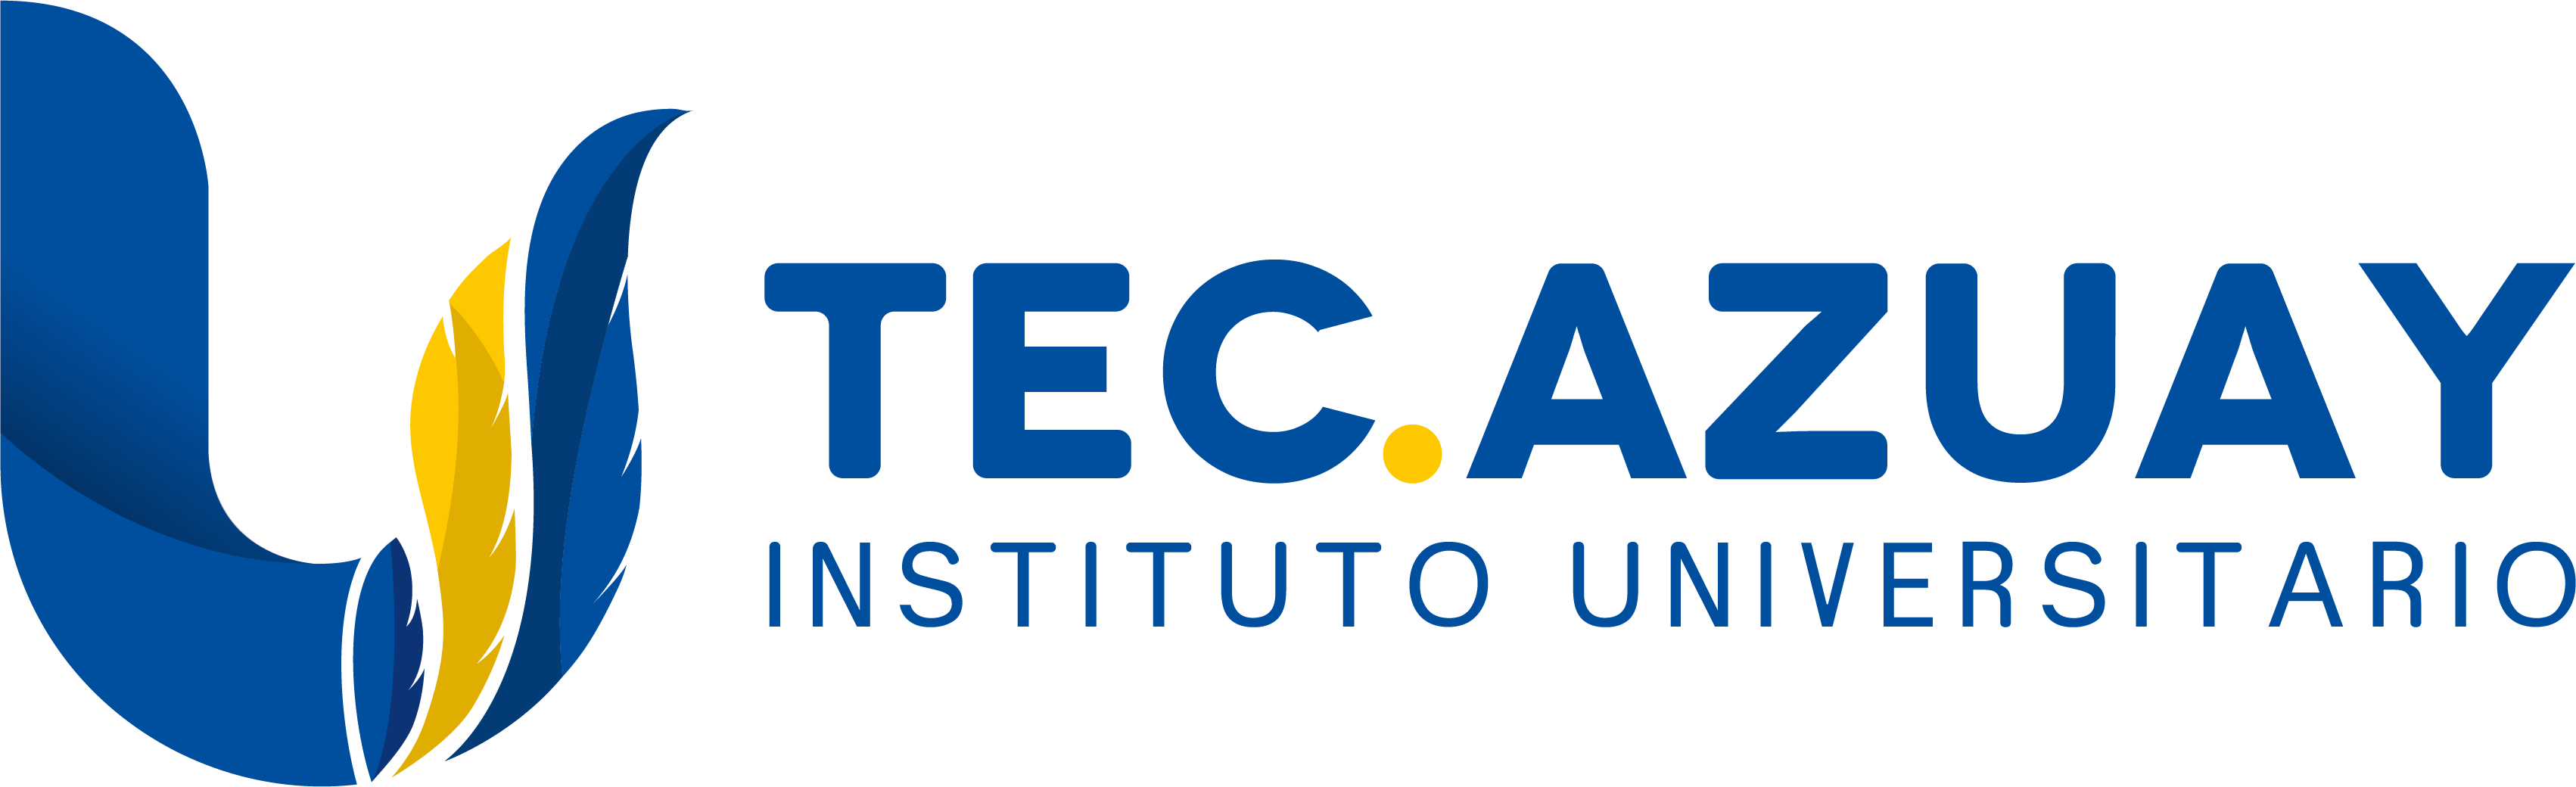

Asignatura: Mineria de datos

Nombre: Danny Pineda

Docente: Ing. Veronica Chimbo


# Clustering en el conjunto de datos

## 1. Preparar los Datos

Primero, asegúrate de tener las bibliotecas necesarias:

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('MAESTRO DE NOTAS.csv')

In [2]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSTITUTO SUPERIOR TECNOLÓGICO DEL AZUAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,REPORTE MAESTRO DE NOTAS,NaN,NaN,NaN,NaN,Fecha Reporte:,NaN,NaN,NaN,NaN,NaN,NaN,VIERNES 19 JULIO 2024 10:12 AM,NaN,NaN,NaN,NaN
2,NaN,Periodo,Paralelo,Identificacion,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,NaN,Asistencia,Nota final,Estado,NaN,Estado Matrícula,Tipo Ingreso,Cédula docente,Nombre docente
3,NaN,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-114-COMUNICACIÓN ORAL Y ESCRITA,1,NaN,93.75,8.59,APROBADO,NaN,APROBADO,NORMAL,0103002036,ANA BEATRIZ PIEDRA MARTINEZ
4,NaN,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-111-DERECHOS HUMANOS EN EL CONTEXTO PENITE...,1,NaN,100.00,8.88,APROBADO,NaN,APROBADO,NORMAL,0103867156,CRUZ GERMANIA DIAZ HERRERA


## 2. Preprocesar los Datos

Eliminamos columnas que contienen información sensible, para el proceso de aplicar k-means

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [4]:
# Eliminar las dos primeras filas
df = df.iloc[2:]

# Resetear el índice del dataframe para que comience desde 0
df.reset_index(drop=True, inplace=True)

# Usar la tercera fila (ahora la primera) como nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la fila que se utilizó para los nombres de las columnas
df = df[1:]

# Resetear el índice del dataframe de nuevo
df.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas del dataset modificado
print("\nDataset modificado:")
print(df.head())


Dataset modificado:
0 NaN  Periodo    Paralelo Identificacion                         Estudiante  \
0 NaN  2023-2P  A_MATUTINA     1750959585  AGUALONGO GUANOTAXI LIDA GERMANIA   
1 NaN  2023-2P  A_MATUTINA     1750959585  AGUALONGO GUANOTAXI LIDA GERMANIA   
2 NaN  2023-2P  A_MATUTINA     1750959585  AGUALONGO GUANOTAXI LIDA GERMANIA   
3 NaN  2023-2P  A_MATUTINA     1750959585  AGUALONGO GUANOTAXI LIDA GERMANIA   
4 NaN  2023-2P  A_MATUTINA     1750959585  AGUALONGO GUANOTAXI LIDA GERMANIA   

0                                            Carrera    Nivel  \
0  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
1  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
2  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
3  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
4  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   

0                                         Asignatura Num_matricula  NaN  \
0                SPR-114-COMUNIC

In [5]:
df.head()

,NaN,Periodo,Paralelo,Identificacion,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,NaN,Asistencia,Nota final,Estado,NaN,Estado Matrícula,Tipo Ingreso,Cédula docente,Nombre docente
0,NaN,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-114-COMUNICACIÓN ORAL Y ESCRITA,1,NaN,93.75,8.59,APROBADO,NaN,APROBADO,NORMAL,0103002036,ANA BEATRIZ PIEDRA MARTINEZ
1,NaN,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-111-DERECHOS HUMANOS EN EL CONTEXTO PENITE...,1,NaN,100.00,8.88,APROBADO,NaN,APROBADO,NORMAL,0103867156,CRUZ GERMANIA DIAZ HERRERA
2,NaN,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-113-ÉTICA PROFESIONAL Y RELACIONES HUMANAS,1,NaN,100.00,9.30,APROBADO,NaN,APROBADO,NORMAL,0103867156,CRUZ GERMANIA DIAZ HERRERA
3,NaN,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR_132-FASE PRÁCTICA,1,NaN,100.00,10.00,APROBADO,NaN,APROBADO,NORMAL,0103867156,CRUZ GERMANIA DIAZ HERRERA
4,NaN,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPRI-112-INSTRUCCIÓN PENITENCIARIA,1,NaN,100.00,9.20,APROBADO,NaN,APROBADO,NORMAL,0103867156,CRUZ GERMANIA DIAZ HERRERA


In [6]:
df.shape

(6007, 18)

In [7]:
# Eliminar múltiples columnas ('B' y 'C') y actualizar el DataFrame en el lugar
df.drop(['Estudiante', 'Identificacion', 'Nombre docente'], axis=1, inplace=True)


In [8]:
# Eliminar columnas que contienen valores NaN en todos sus elementos
df = df.dropna(axis=1, how='all')

# Eliminar columnas cuyo nombre es NaN
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


Verificamos si se eliminaron correctamente las oclumnas, mostrando los nombres de columnas

In [9]:
df.columns

Index(['Periodo', 'Paralelo', 'Carrera', 'Nivel', 'Asignatura',
       'Num_matricula', 'Asistencia', 'Nota final', 'Estado',
       'Estado Matrícula', 'Tipo Ingreso', 'Cédula docente'],
      dtype='object', name=0)

In [10]:
df.head()

,Periodo,Paralelo,Carrera,Nivel,Asignatura,Num_matricula,Asistencia,Nota final,Estado,Estado Matrícula,Tipo Ingreso,Cédula docente
0,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-114-COMUNICACIÓN ORAL Y ESCRITA,1,93.75,8.59,APROBADO,APROBADO,NORMAL,0103002036
1,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-111-DERECHOS HUMANOS EN EL CONTEXTO PENITE...,1,100.00,8.88,APROBADO,APROBADO,NORMAL,0103867156
2,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-113-ÉTICA PROFESIONAL Y RELACIONES HUMANAS,1,100.00,9.30,APROBADO,APROBADO,NORMAL,0103867156
3,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR_132-FASE PRÁCTICA,1,100.00,10.00,APROBADO,APROBADO,NORMAL,0103867156
4,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPRI-112-INSTRUCCIÓN PENITENCIARIA,1,100.00,9.20,APROBADO,APROBADO,NORMAL,0103867156


In [11]:
df.isnull().sum()

0
Periodo               0
Paralelo            202
Carrera               0
Nivel                 0
Asignatura            0
Num_matricula         0
Asistencia          231
Nota final          187
Estado                0
Estado Matrícula      0
Tipo Ingreso          0
Cédula docente      202
dtype: int64

In [12]:
# Convertir columnas a numéricas donde sea posible
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5680\4018537174.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [13]:
# Manejar los valores faltantes en columnas numéricas
# Primero, identificamos las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Llenar los valores nulos en las columnas numéricas con la media de cada columna
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Comprobar de nuevo la cantidad de valores nulos en cada columna después de llenar los valores faltantes
nulos_por_columna_despues = df.isnull().sum()
print("\nCantidad de valores nulos por columna después de manejar los valores faltantes:")
print(nulos_por_columna_despues)


Cantidad de valores nulos por columna después de manejar los valores faltantes:
0
Periodo               0
Paralelo            202
Carrera               0
Nivel                 0
Asignatura            0
Num_matricula         0
Asistencia            0
Nota final            0
Estado                0
Estado Matrícula      0
Tipo Ingreso          0
Cédula docente        0
dtype: int64


In [14]:
# Reemplazar los valores nulos en la columna 'paralelo' con 'N/A'
df['Paralelo'] = df['Paralelo'].fillna('N/A')

df.isnull().sum()


0
Periodo             0
Paralelo            0
Carrera             0
Nivel               0
Asignatura          0
Num_matricula       0
Asistencia          0
Nota final          0
Estado              0
Estado Matrícula    0
Tipo Ingreso        0
Cédula docente      0
dtype: int64

In [15]:
#guardar el excel arreglado
df.to_csv('Cluster_Data_Limpia.csv', index=False)

Seleccionaremos características relevantes para el clustering y escalaremos los datos:

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Periodo           6007 non-null   object 
 1   Paralelo          6007 non-null   object 
 2   Carrera           6007 non-null   object 
 3   Nivel             6007 non-null   object 
 4   Asignatura        6007 non-null   object 
 5   Num_matricula     6007 non-null   int64  
 6   Asistencia        6007 non-null   float64
 7   Nota final        6007 non-null   float64
 8   Estado            6007 non-null   object 
 9   Estado Matrícula  6007 non-null   object 
 10  Tipo Ingreso      6007 non-null   object 
 11  Cédula docente    6007 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 563.3+ KB


In [18]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características relevantes para clustering
features = ['Num_matricula','Asistencia','Nota final','Cédula docente']
X = df[features]
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Convertir variables categóricas a numéricas usando LabelEncoder

In [19]:
label_encoders = {}
for column in ['Periodo', 'Paralelo', 'Carrera', 'Nivel', 'Asignatura', 'Estado', 'Estado Matrícula', 'Tipo Ingreso']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Nos aseguramos de que todos los valores sean str
    label_encoders[column] = le


## 3. Aplicar K-Means

Definimos el número de clusters y aplicamos el algoritmo K-Means:

In [20]:
# Definir el número de clusters
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Agregar el resultado del clustering al DataFrame
df['Cluster'] = clusters


## 4. Visualizar los Resultados del Clustering

Podemos visualizar los resultados del clustering en un gráfico 2D usando dos de las características:

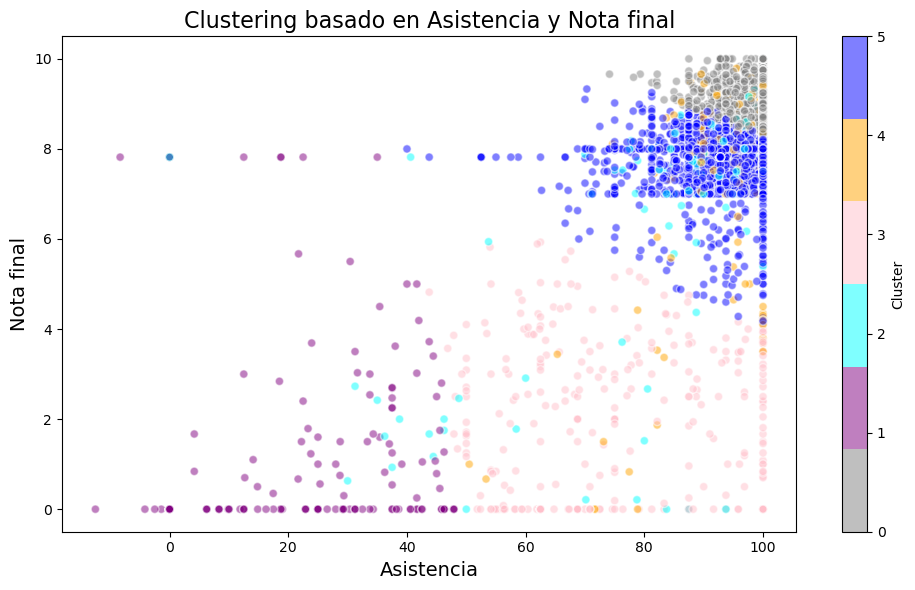

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definir una paleta de colores personalizada
colors = ['grey', 'purple', 'cyan', 'pink', 'orange', 'blue']
cmap = mcolors.ListedColormap(colors)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Asistencia'], df['Nota final'], c=df['Cluster'], cmap=cmap, alpha=0.5, edgecolors='w')

plt.title("Clustering basado en Asistencia y Nota final", fontsize=16)
plt.xlabel("Asistencia", fontsize=14)
plt.ylabel("Nota final", fontsize=14)

# Añadir una barra de color personalizada
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


## 5. Análisis de Resultados de Clustering

Ahora puedes analizar cada cluster:

In [22]:
cluster_summary = df.groupby('Cluster').agg({
    'Asistencia': 'mean',
    'Nota final': 'mean',
    'Carrera': lambda x: x.mode()[0],  # Carrera más frecuente
    'Nivel': lambda x: x.mode()[0],    # Nivel más frecuente
    'Estado': lambda x: x.mode()[0],   # Estado más frecuente
    'Tipo Ingreso': lambda x: x.mode()[0]  # Tipo Ingreso más frecuente
}).reset_index()

print(cluster_summary)


0  Cluster  Asistencia  Nota final  Carrera  Nivel  Estado  Tipo Ingreso
0        0   98.885278    9.239466        4      1       0             1
1        1   17.285714    1.008881       12      1       2             1
2        2   88.901150    7.146075        1      3       0             1
3        3   76.247391    2.028127       12      1       2             1
4        4   95.469952    7.644019        9      4       0             1
5        5   94.821969    7.698372        4      1       0             1


Claro, vamos a interpretar cada cluster basándonos en las características proporcionadas:

### Cluster 0
- **Asistencia**: 98.89
- **Nota final**: 9.24
- **Carrera**: 4
- **Nivel**: 1
- **Estado**: 0
- **Tipo Ingreso**: 1

**Interpretación**: Los estudiantes en este cluster tienen una asistencia casi perfecta y una nota final muy alta. Pertenecen a una carrera específica (Carrera 4) y están en el primer nivel. El estado y el tipo de ingreso indican que estos estudiantes probablemente tienen una situación académica y financiera estable. Este grupo representa estudiantes altamente comprometidos y exitosos académicamente.

### Cluster 1
- **Asistencia**: 17.29
- **Nota final**: 1.01
- **Carrera**: 12
- **Nivel**: 1
- **Estado**: 2
- **Tipo Ingreso**: 1

**Interpretación**: Este cluster agrupa a estudiantes con baja asistencia y notas finales muy bajas. Están en la Carrera 12 y también en el primer nivel, pero el estado y tipo de ingreso sugieren que podrían enfrentar dificultades. Estos estudiantes podrían necesitar intervención adicional para mejorar su desempeño académico y asistencia.

### Cluster 2
- **Asistencia**: 88.90
- **Nota final**: 7.15
- **Carrera**: 1
- **Nivel**: 3
- **Estado**: 0
- **Tipo Ingreso**: 1

**Interpretación**: Los estudiantes en este cluster tienen una asistencia alta y un rendimiento académico bastante bueno. Están en la Carrera 1 y en el tercer nivel. Su estado y tipo de ingreso indican estabilidad. Este grupo representa estudiantes con un buen equilibrio entre asistencia y rendimiento académico, que están avanzando adecuadamente en su carrera.

### Cluster 3
- **Asistencia**: 76.25
- **Nota final**: 2.03
- **Carrera**: 12
- **Nivel**: 1
- **Estado**: 2
- **Tipo Ingreso**: 1

**Interpretación**: Este cluster incluye estudiantes con buena asistencia pero con calificaciones bastante bajas. Pertenecen a la Carrera 12 y están en el primer nivel. El estado y tipo de ingreso indican que podrían tener problemas a pesar de asistir regularmente. Puede ser útil investigar las razones detrás de sus bajas notas para ofrecer apoyo adicional.

### Cluster 4
- **Asistencia**: 95.47
- **Nota final**: 7.64
- **Carrera**: 9
- **Nivel**: 4
- **Estado**: 0
- **Tipo Ingreso**: 1

**Interpretación**: Los estudiantes en este cluster muestran una alta asistencia y un rendimiento académico superior. Están en la Carrera 9 y en el cuarto nivel, lo que sugiere que han avanzado mucho en su programa. Su estabilidad en estado y tipo de ingreso es un buen indicador de éxito académico continuo.

### Cluster 5
- **Asistencia**: 94.82
- **Nota final**: 7.70
- **Carrera**: 4
- **Nivel**: 1
- **Estado**: 0
- **Tipo Ingreso**: 1

**Interpretación**: Este grupo tiene alta asistencia y excelentes notas finales, similar al Cluster 0. Están en la Carrera 4 y en el primer nivel. La alta asistencia y buen rendimiento sugieren que estos estudiantes están bien preparados y motivados desde el inicio de su carrera.
